# Final Project
BioE 131/231 Fall 2019

## Overview
Congratulations, all! You have made	it to the final	project. From now	until the end of the semester, you will analyze a set of genomes using the skills you have learned thus far and explore new types of analysis. These genomes come from the Salmonella reference collection (https://people.ucalgary.ca/~kesander/Kit_14A.html), which were isolated from different sources many years ago, but have not been fully analyzed. We are interested in learning more about these strains and their pathogenicity.

The goal of this part of class is to let you work on a real, unpublished dataset, applying your  own ideas of how best to conduct the analysis. Ideas for projects, deliverables, and due dates  are listed below on a week-by-week basis.

## Timeline
**Week 1:** Break into groups, obtain data, assemble genome, annotate genome.  
**Week 2:** Propose your own analysis.	
**Week 3:** No lab (Thanksgiving). Work on your own analysis.	
**Week 4:** Group presentations during lab. Final report due.  

## Background
Genome sequencing and assembly are common techniques in biology. To obtain the sequence of a long genome, DNA must be chopped into small pieces that can be read by a sequencer. These short reads must then be stitched back together to form a complete genome. Often, the genome cannot be fully assembled because there are multiple equally plausible ways of stitching the reads together. Ideally, each chromosome is assembled into a single, long sequence. In practice, chromosomes are often assembled into multiple “contigs,” or contiguous sequences. A genome assembly is generally considered complete only when all (or nearly all) the sequences are accounted for. Otherwise, it is considered a draft genome.  

In a previous lab, you filtered human reads from a bacterial genome by alignment using Bowtie2. In this lab, you will continue your analysis, albeit with a different set of reads. First, you must take the reads and combine them into a complete genome. Next week, you will analyze the contents of your genome.

## Week 1
First off, find a group of four people (max five per group). Please let your GSI know who is in your new group so they can keep track. Your GSI will assign you a set of reads for the final project. Each group will be given a different set of reads.  

Next, please assemble your genome into contigs using SPAdes as we did in lab 8/9 using the -1 and -2 flags for paired end reads. Remember to run your assembly using -t 1 and -m 16 to limit your CPU and memory usage (save some for everyone else). If those limits are too low, let your GSI know. This will take a while, so be sure to run it in tmux.  

When you’re done, calculate assembly statistics and plot a histogram of contig lengths from your genome assembly in iPython, along with the N50. Summarize your results from SeqMatch (do we have the strain we expect?) and RAST/BASys annotations. (If annotation isn't ready in time, submit this in Week 2). Your report is due the following Wednesday at 11:59 AM.

### Running SPAdes
Ran
```
ls /bigdata/FinalProject_data
ls /bigdata/FinalProject_data/190724_SARA_Genomes
```
to validate the file location and file names.  

Prepare spades command and run from `/bigdata/FinalProject_groups/Group_5/assembly`: 
```
spades.py -o . -1 /bigdata/FinalProject_data/190724_SARA_Genomes/SARA_5_S28_L004_R1_001.fastq.gz -2 /bigdata/FinalProject_data/190724_SARA_Genomes/SARA_5_S28_L004_R2_001.fastq.gz -t 1
```
-o is destination directory (. for present directory)  
-1 is location of reads 1  
-2 is location of reads 2  
-t 1 reserves only 1 core for the process  

### Run assembly-stats
Prepare Command, run from `bigdata/FinalProject_groups/Group_5/assembly`: 
```
assembly-stats ./contigs.fasta ./scaffolds.fasta
```
Output: 
```
stats for ./contigs.fasta
sum = 4960322, n = 153, ave = 32420.41, largest = 449208
N50 = 194186, n = 9
N60 = 130292, n = 13
N70 = 109439, n = 17
N80 = 87947, n = 22
N90 = 51460, n = 29
N100 = 56, n = 153
N_count = 0
Gaps = 0
----------------------------------------------------------------
stats for ./scaffolds.fasta
sum = 4960972, n = 146, ave = 33979.26, largest = 449208
N50 = 223794, n = 8
N60 = 159283, n = 10
N70 = 143384, n = 13
N80 = 89581, n = 18
N90 = 56692, n = 24
N100 = 56, n = 146
N_count = 700
Gaps = 7
```

### Plot Contig Coverage Histogram

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO

#### Extract Coverage Data

In [2]:
coverage_datas = []
directory = "/bigdata/FinalProject_groups/Group_5/assembly/"
file_names = ["contigs", "scaffolds"]
for file_name in file_names:
    coverage_data = []
    with open(directory + file_name + ".fasta", "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            header = record.id
            index = int(header.find("_cov_") + len("_cov_"))
            coverage = float(header[index:])
            coverage_data.append(coverage)
    coverage_datas.append(coverage_data)

#### Plot Coverage Data Histogram

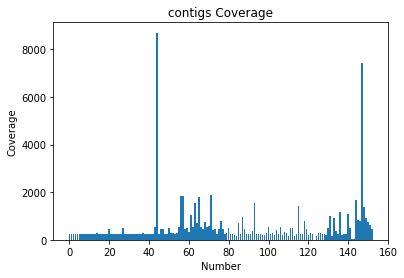

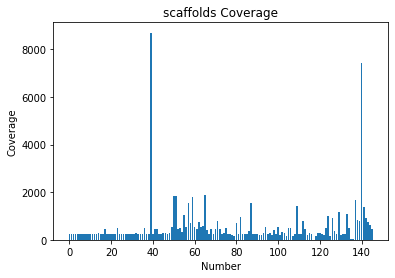

In [3]:
for i in range(len(coverage_datas)):
    coverage_data = coverage_datas[i]
    plt.title(file_names[i] + " Coverage")
    plt.bar(range(len(coverage_data)), coverage_data)
    plt.xlabel("Number")
    plt.ylabel("Coverage")
    plt.show()

### Plot Contig Length Histogram

In [4]:
length_datas = []
directory = "/bigdata/FinalProject_groups/Group_5/assembly/"
file_names = ["contigs", "scaffolds"]
for file_name in file_names:
    length_data = []
    with open(directory + file_name + ".fasta", "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            header = record.id
            start_index = int(header.find("_length_") + len("_length_"))
            end_index = int(header.find("_cov_") + len("_cov_"))
            coverage = float(header[start_index:end_index-5])
            length_data.append(coverage)
    length_datas.append(length_data)

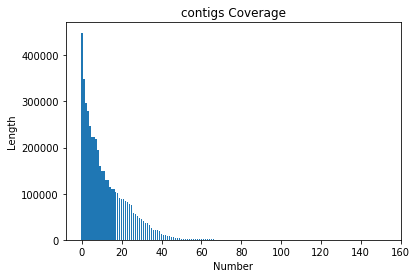

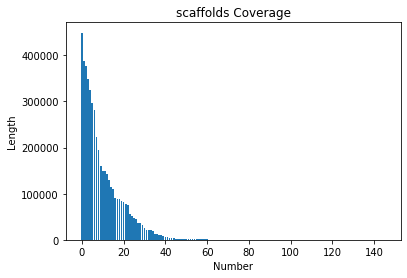

In [5]:
for i in range(len(length_datas)):
    length_data = length_datas[i]
    plt.title(file_names[i] + " Coverage")
    plt.bar(range(len(length_data)), length_data)
    plt.xlabel("Number")
    plt.ylabel("Length")
    plt.show()

## Identify the taxon from which your genome originated

We moved the HMM database to `/bigdata/FinalProject_groups/Group_5/rna_hmm3/HMM3`: 
```
ls /bigdata/FinalProject_groups/Group_5/rna_hmm3/HMM3
```
```
arc_lsu.hmm  arc_ssu.hmm  arc_tsu.hmm  bac_lsu.hmm  bac_ssu.hmm  bac_tsu.hmm
```
run `rna_hmm.py` from `/bigdata/FinalProject_groups/Group_5`
```
rna_hmm3.py -i /bigdata/FinalProject_groups/Group_5/assembly/contigs.fasta -o ./rna_hmm3_o -L /bigdata/FinalProject_groups/Group_5/rna_hmm3/HMM3
```
output file: `rna_hmm3_o`

Made a copy and deleted all lines other than 16S_rRNA in text editor. Filename: `rna_hmm3_16`

Extract nucleic acid sequences from `/bigdata/FinalProject_groups/Group_5`
Note: didn't have write-permission to assembly, so ran
```
cp assembly/contigs.fasta .
```
```
bedtools getfasta -fi ./contigs.fasta -bed ./rna_hmm3_16 -fo ./nucleic_acids
```

Output sequence in next cell.  

Ran SeqMatch on `contigs.fasta`

domain Bacteria (20)  
&nbsp;&nbsp;&nbsp;phylum "Proteobacteria" (20)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class Gammaproteobacteria (20)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;order Enterobacteriales (20)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;family Enterobacteriaceae (20)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;genus Salmonella (20)  

```
>NODE_57_length_1736_cov_1821.819155:45-1598
AAGGTAAGGAGGTGATCCAACCGCAGGTTCCCCTACGGTTACCTTGTTACGACTTCACCCCAGTCATGAATCACAAAGTGGTAAGCGCCCTCCCGAAGGTTAAGCTACCTACTTCTTTTGCAACCCACTCCCATGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGTGGCATTCTGATCCACGATTACTAGCGATTCCGACTTCATGGAGTCGAGTTGCAGACTCCAATCCGGACTACGACGCACTTTATGAGGTCCGCTTGCTCTCGCGAGGTCGCTTCTCTTTGTATGCGCCATTGTAGCACGTGTGTAGCCCTGGTCGTAAGGGCCATGATGACTTGACGTCATCCCCACCTTCCTCCAGTTTATCACTGGCAGTCTCCTTTGAGTTCCCGACCTAATCGCTGGCAACAAAGGATAAGGGTTGCGCTCGTTGCGGGACTTAACCCAACATTTCACAACACGAGCTGACGACAGCCATGCAGCACCTGTCTCACAGTTCCCGAAGGCACCAATCCATCTCTGGAAAGTTCTGTGGATGTCAAGACCAGGTAAGGTTCTTCGCGTTGCATCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCATTTGAGTTTTAACCTTGCGGCCGTACTCCCCAGGCGGTCTACTTAACGCGTTAGCTCCGGAAGCCACGCCTCAAGGGCACAACCTCCAAGTAGACATCGTTTACGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCACCTGAGCGTCAGTCTTTGTCCAGGGGGCCGCCTTCGCCACCGGTATTCCTCCAGATCTCTACGCATTTCACCGCTACACCTGGAATTCTACCCCCCTCTACAAGACTCAAGCCTGCCAGTTTCGAATGCAGTTCCCAGGTTGAGCCCGGGGATTTCACATCCGACTTGACAGACCGCCTGCGTGCGCTTTACGCCCAGTAATTCCGATTAACGCTTGCACCCTCCGTATTACCGCGGCTGCTGGCACGGAGTTAGCCGGTGCTTCTTCTGCGGGTAACGTCAATTGCTGCGGTTATTAACCACAACACCTTCCTCCCCGCTGAAAGTACTTTACAACCCGAAGGCCTTCTTCATACACGCGGCATGGCTGCATCAGGCTTGCGCCCATTGTGCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGACCGTGTCTCAGTTCCAGTGTGGCTGGTCATCCTCTCAGACCAGCTAGGGATCGTCGCCTTGGTGAGCCGTTACCTCACCAACAAGCTAATCCCATCTGGGCACATCTGATGGCAAGAGGCCCGAAGGTCCCCCTCTTTGGTCTTGCGACGTTATGCGGTATTAGCCACCGTTTCCAGTAGTTATCCCCCTCCATCAGGCAGTTTCCCAGACATTACTCACCCGTCCGCCACTCGTCAGCGAAGCAGCAAGCTGCTTCCTGTTACCGTTCGACTTGCATGTGTTAGGCCTGCCGCCAGCGTTCAATCTGAGCCATGATCAAACTCTTCAATTTAAAAGTT
```

![SeqMatch_results](SeqMatch_results.png)

## Genome annotation
### RAST
`
Login: Qube5  
Password: w5mAvPg4  
`  

ran RAST annotation with contigs.fasta

Job Status: http://rast.theseed.org/FIG/rast.cgi?page=JobDetails&job=797079

--------------------------

## Week 2
By now, you should have an assembly and annotation of your genome. While you are waiting for your annotations, you can start brainstorming ideas for your own analysis. Before you leave  today, make sure your GSI approves of your project. You will have two weeks (including 
Thanksgiving) to work on it before your final presentation.  

**A list of project ideas will be uploaded to bCourses shortly if it hasn’t been already.**  

Upload a report summarizing the findings of your annotations and a description of the project you intend to work on by the following Wednesday at 11:59 AM.

--------------------------

## Presentations
Prepare a ten minute PowerPoint presentation describing all of the results of your genome assembly and analysis. Everyone in your group should speak during the presentation. You will have 5 minutes for questions at the end.  Summarize the results of your assembly (e.g., N50, contig length histogram).  

Summarize the results of your annotations.  
Which analysis project did you choose?  
What were some of the issues you ran into?  
What were your results?  
If you had more time, what additional experiments and analyses would you perform?

--------------------------

## Written report
Submit a report (up to 5 pages, not included figures) along with your final presentation. This report should summarize your assembly results, your annotations, the methods that you used for your original analysis, and the findings of your analysis. Please be clear about the question you are trying to answer, how your chosen method will help you answer it, and any potential limitations of your results

--------------------------